In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 그래프를 노트북에 바로 표시하기 위한 설정
%matplotlib inline

In [ ]:
# 가상의 일별 판매 데이터 생성
data = {
    'ds': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', 
                        '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10',
                        '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15']),
    'y': [10, 12, 15, 14, 18, 25, 22, 28, 30, 27, 35, 33, 40, 38, 45]
}
df = pd.DataFrame(data)

print(df.head())

          ds   y
0 2023-01-01  10
1 2023-01-02  12
2 2023-01-03  15
3 2023-01-04  14
4 2023-01-05  18


In [ ]:
# Prophet 모델 객체 생성
m = Prophet()

# 모델 학습
m.fit(df)

17:15:54 - cmdstanpy - INFO - Chain [1] start processing
17:15:55 - cmdstanpy - INFO - Chain [1] done processing


           ds
17 2023-01-18
18 2023-01-19
19 2023-01-20
20 2023-01-21
21 2023-01-22
           ds       yhat  yhat_lower  yhat_upper
15 2023-01-16  46.055525   44.366349   47.690658
16 2023-01-17  46.054547   44.418740   47.581721
17 2023-01-18  49.555015   47.895385   51.227436
18 2023-01-19  50.554442   48.981577   52.279489
19 2023-01-20  57.556346   55.867830   59.181823
20 2023-01-21  55.054419   53.316680   56.682746
21 2023-01-22  61.074696   59.429304   62.872869


/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure

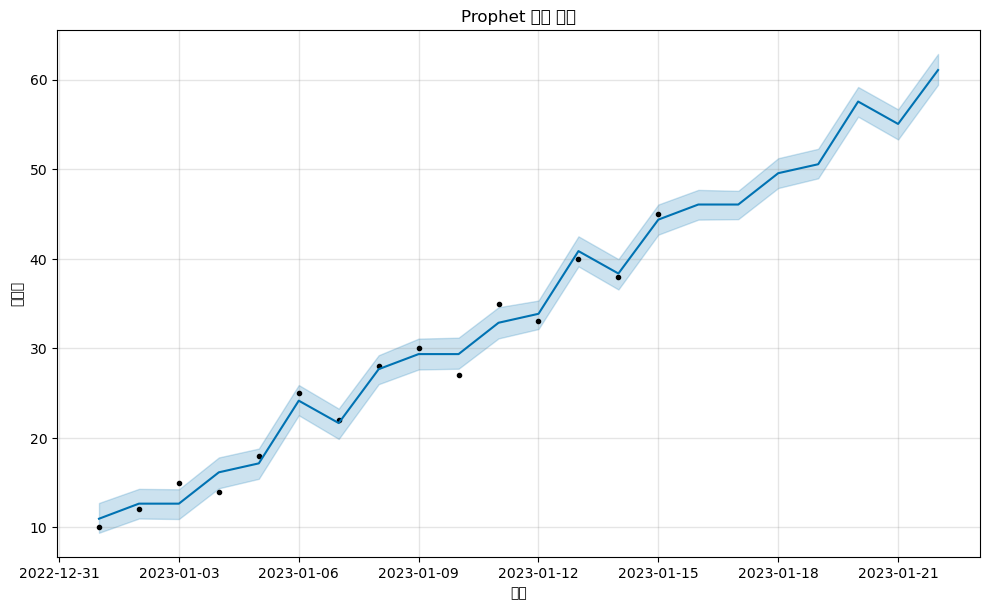

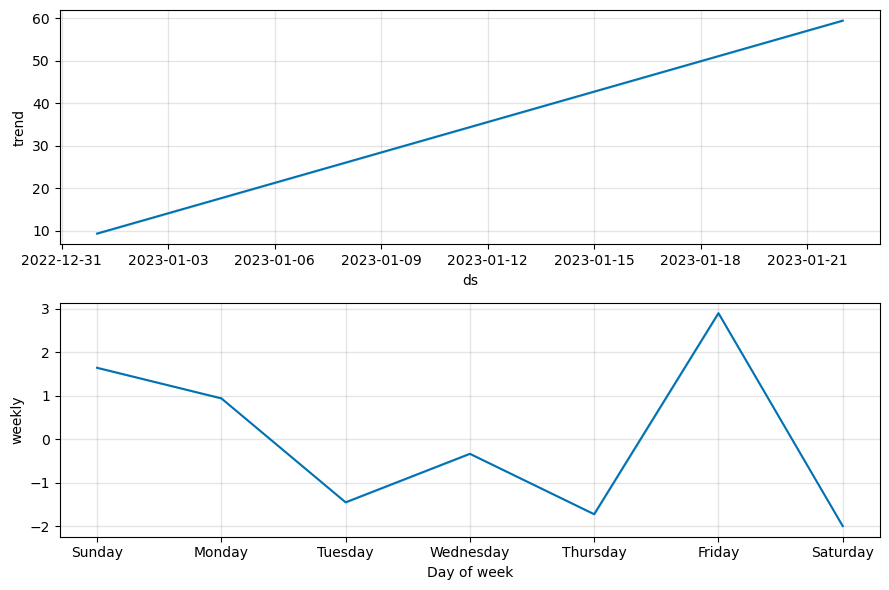

In [ ]:
# 7일 동안의 미래 예측을 위한 데이터프레임 생성
future = m.make_future_dataframe(periods=7)

print(future.tail())

# 예측 수행
forecast = m.predict(future)

# 예측 결과 확인
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

# 예측 결과 시각화
fig1 = m.plot(forecast)
plt.title("Prophet 예측 결과")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.show()

# 추세 및 계절성 시각화
fig2 = m.plot_components(forecast)
plt.show()